In [4]:
import numpy as np

np.set_printoptions(suppress=True)

np.set_printoptions(threshold=20)
np.set_printoptions(threshold=400)

np.set_printoptions(edgeitems=10)

np.set_printoptions(precision=4)
#np.set_printoptions(precision=3)
np.set_printoptions(precision=2)
#np.set_printoptions(precision=1)
#np.set_printoptions(precision=0)

%precision 4
%precision 2


'%.2f'

In [128]:
%matplotlib inline
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

from einops import rearrange, reduce, repeat, pack, unpack

In [151]:
vd=np.array([1,0.0])

ve=np.array([0,1.0])

vf=np.array([0.95,0.3])


In [129]:
ey=np.eye(2)
pauli1=np.array([[0,1],[1,0.0]])
pauli3=np.array([[1,0],[0,-1.0]])
pau13=pauli1@ pauli3
ep=np.array([[0,1],[0,0.0]]).T
ey,pauli1,pauli3,pau13,ep

(array([[1., 0.],
        [0., 1.]]),
 array([[0., 1.],
        [1., 0.]]),
 array([[ 1.,  0.],
        [ 0., -1.]]),
 array([[ 0., -1.],
        [ 1.,  0.]]),
 array([[0., 0.],
        [1., 0.]]))

In [132]:
def Hforx(x):# computes the hue corresponding to the
    H = np.arctan2(
        x[:,:,1],   #.flatten(),
        x[:,:,0]  #.flatten(), pivot='mid'
    )  / (2*np.pi) + 1
    #np.angle(z)
    return np.mod(H, 1)

In [147]:
def plot_scalars(w):
    sns.heatmap(w,  cmap=plt.cm.BrBG, center = 0,  xticklabels=False, yticklabels=False)# 


In [174]:
n3= 256 # 64 #  16 # 8 # 4 #64  # 4 # 3  #55 # 3 #11  #5  # 3  # 51  # 5 # 3  #
lo=-1  # -2
hi=+1  # 2

x = np.linspace(lo,hi,n3)    #(-2,2,n3)
y = np.linspace(hi,lo,n3)

xlinsp=x
ylinsp=y
#x = np.random.randn(50)

xx,yy = np.meshgrid(x,y)
xxyy=[xx,yy]
#xx,yy
xx.shape, yy.shape

###rearrange(x, 'b h w c -> b h w c').shape
#x=rearrange(xxyy, 'b h w  -> b h w ')
#x=rearrange(xxyy, 'b h w  ->  h w 1 b ')
####x=rearrange(xxyy, 'b h w  ->  h w 2 b ')
x=rearrange(xxyy, 'b h w  ->  h w  b ')
y=rearrange(xxyy, 'b h w  ->  h w 1 b ')
#x=rearrange(xxyy, 'b h w  ->  h w  b ')
#y=repeat(x, ' h w b ->  h w 2 b' )
print(x.shape, y.shape)
#print(x,y)
#y[0,0]


(256, 256, 2) (256, 256, 1, 2)


# vectors to scalars

<Axes: >

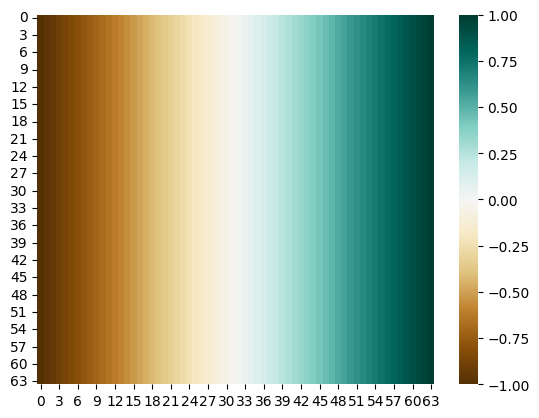

In [62]:
##f=x.inner(vd)
##x.inner?
f=np.inner(x, vd  )
#f=np.inner(x, np.array([0,1])  )
#print(f)
plot_scalars(f)

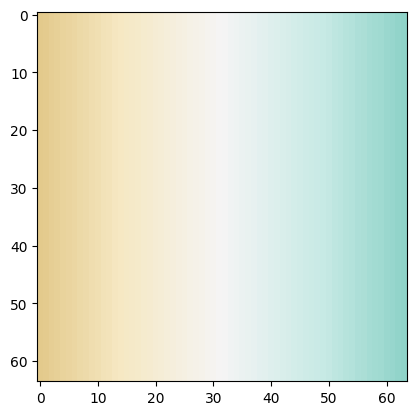

In [63]:
plt.imshow(f  ,  cmap=plt.cm.BrBG, vmin=-2.8, vmax=+2.8)  # aspect=3,

<Axes: >

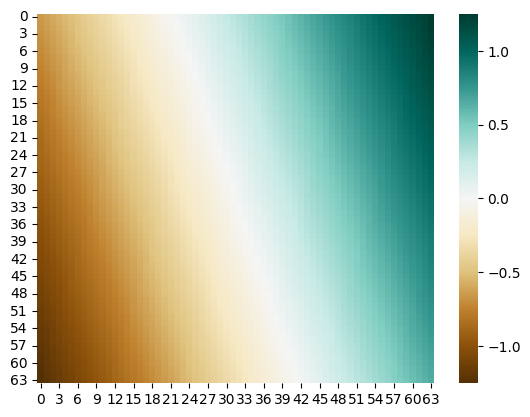

In [65]:
f=np.inner(x, vf  )
plot_scalars(f)

<Axes: >

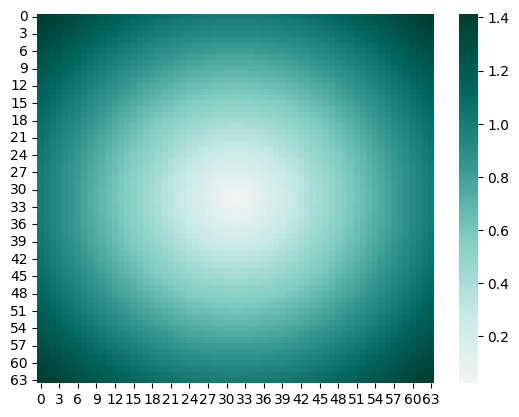

In [66]:
f=np.linalg.norm(x, axis=(2))
###np.linalg.norm(x, axis=(0,1))
##np.linalg.norm(x, axis=(2,3))
plot_scalars(f)

https://pytorch.org/docs/stable/generated/torch.einsum.html

<Axes: >

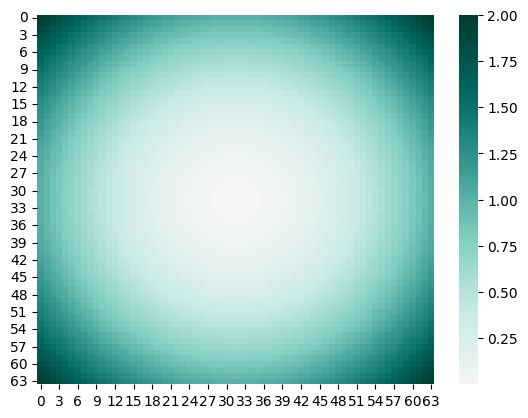

In [70]:
##f=np.inner(x, x  )
###f=np.matmul(x, x  )
#####f=np.dot(x, x  )
##f=np.tensordot(x,x,  axes=([2],[2])) 
#f=(x*x).sum(axis=2)



f=np.einsum('ijk,ijk->ij', x, x)
f=np.einsum('...k,...k', x, x)
f.shape
plot_scalars(f)

<Axes: >

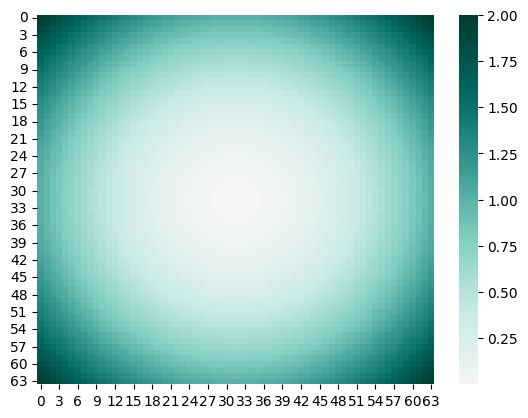

In [67]:
##f=np.inner(x, x  )
###f=np.matmul(x, x  )
#####f=np.dot(x, x  )
f=(x*x).sum(axis=2)
f.shape
plot_scalars(f)

<Axes: >

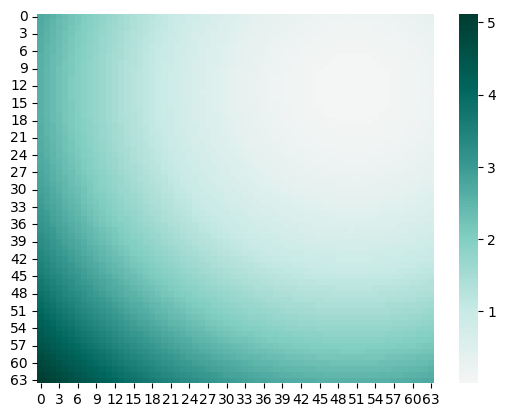

In [46]:
##f=np.inner(x, x  )
###f=np.matmul(x, x  )
#####f=np.dot(x, x  )
f=((x-0.6)**2).sum(axis=2)
f.shape
plot_scalars(f)

<Axes: >

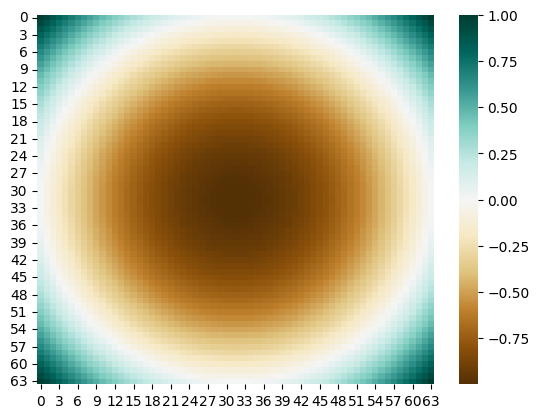

In [51]:
##f=np.inner(x, x  )
###f=np.matmul(x, x  )
#####f=np.dot(x, x  )
f=((x)**2).sum(axis=2) - 1
f.shape
plot_scalars(f)

<Axes: >

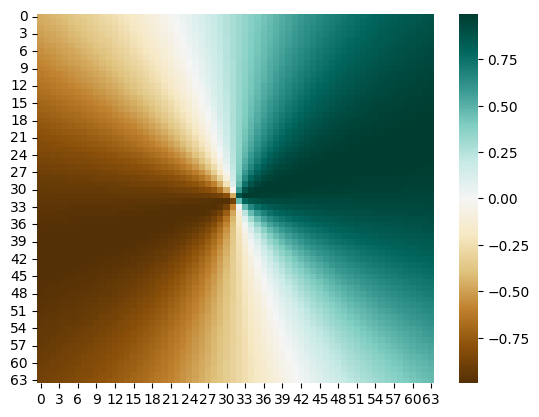

In [42]:
f=np.inner(x, np.array([0.95,0.3])  )
g=np.linalg.norm(x, axis=(2))
###np.linalg.norm(x, axis=(0,1))
##np.linalg.norm(x, axis=(2,3))
plot_scalars(f/g,  )

<Axes: >

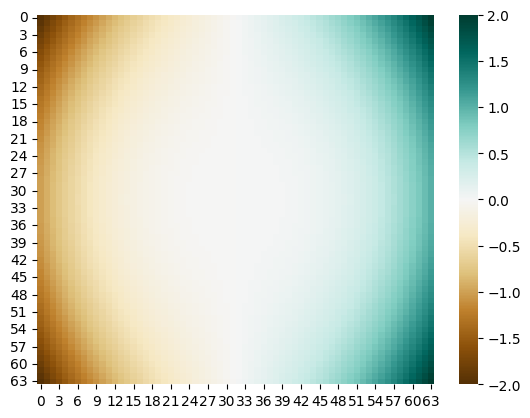

In [50]:
##f=np.inner(x, x  )
###f=np.matmul(x, x  )
#####f=np.dot(x, x  )
ff=((x)**2).sum(axis=2)
fff = rearrange(ff,'h w   -> h w   1' )
f=np.inner(fff * x, np.array([1,0])  )
#f = rearrange(ffff,'h w 1  -> h w   ' )


f.shape
plot_scalars(f)

<Axes: >

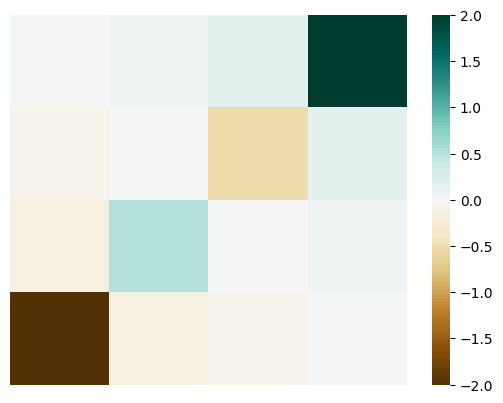

In [84]:
##f=np.inner(x, x  )
###f=np.matmul(x, x  )
#####f=np.dot(x, x  )

#ff=((x-0.5)**2).sum(axis=2)
ff=((x)**2).sum(axis=2) - 1

fff = rearrange(ff,'h w   -> h w   1' )
#f=np.inner(fff * x, np.array([1,0])  )
f=np.inner(fff * x, np.array([1,1])  )
#f = rearrange(ffff,'h w 1  -> h w   ' )


f.shape
plot_scalars(f)


In [44]:
np.linalg.norm(x[0,0,:,:])

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

# vectors to vectors

In [125]:
def domaincol_c(w, s):#Classical domain coloring
    # w is the  array of values f(z)
    # s is the constant saturation
    
    H = Hforx(w)  #complex(w)
    S = s * np.ones(H.shape)
    modul =     np.linalg.norm(w , axis=(2))
    #np.absolute(w)
    V = (1.0-1.0/(1+modul**2))**  0.5  #0.2    #aaaa
    # the points mapped to infinity are colored with white; hsv_to_rgb(0, 0, 1)=(1, 1, 1)=white

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB         

In [135]:
# some lines from https://...

def plot_domainw(
                w, #color_func, f, 
                #re=[-1,1], im= [-1,1], title='',
                #N= 32,  # 16,  # 64,  # 100,   #200,
                ) :

    s=0.7
    # s=0.9    
    daxis=True  #None

    #w = func_vals(f, re, im, N)
    
    #domc = color_func(w, s)
    domc = domaincol_c(w,s)
    
    #plt.xlabel("$\Re(z)$")
    #plt.ylabel("$\Im(z)$")
    #plt.title(title)

    #if(daxis):
    if(daxis):
        #plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
        plt.imshow(domc, ) #origin="lower" ) #, extent=[re[0], re[1], im[0], im[1]])
        
    else:
        #plt.imshow(domc, origin="lower")
        #plt.axis('off')
        plt.quiver(
            xx.flatten(),
            yy.flatten(),
            w[:,:,0].flatten(),
            w[:,:,1].flatten(), pivot='mid'
            #x=rearrange(xxyy, 'b h w  ->  h w  b ')
            #rearrange(xx, 'h w b -> (h w) b')
            #rearrange(yy, 'h w b -> (h w) b')
            #xlinsp, ylinsp
        )

        

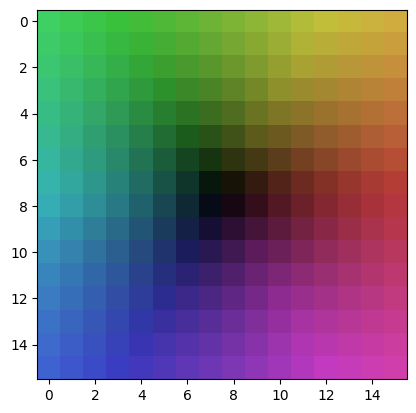

In [136]:
plot_domainw(x)

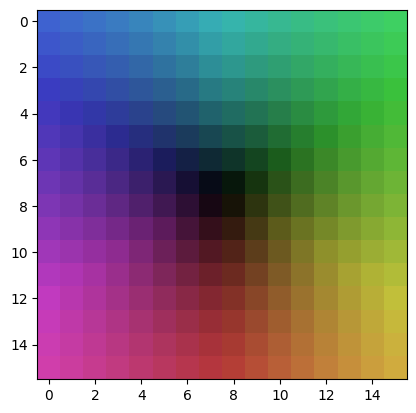

In [137]:
plot_domainw( x @ pau13.T )
#x @ pauli1
###pauli1 @ x

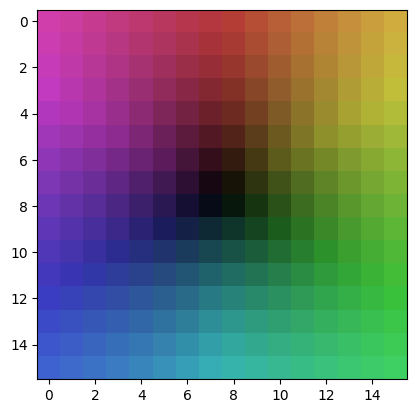

In [138]:
plot_domainw( x @ pauli1.T )


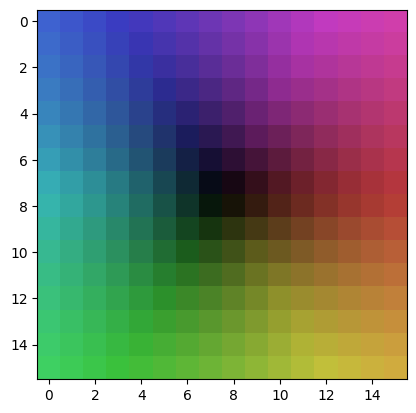

In [139]:
plot_domainw( x @ pauli3.T )


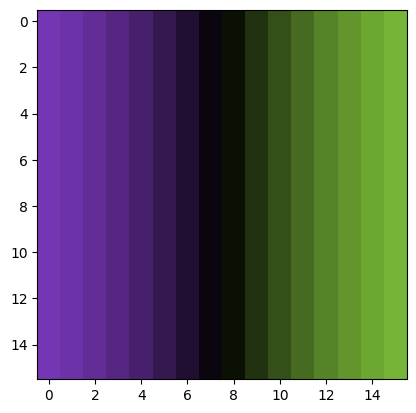

In [140]:
plot_domainw( x @ ep.T )


# matrices to scalars

In [175]:
#repeat(np.array([1.0,0]),  'i -> 3 3 1 i'  )
c0=repeat(np.array([1.0,0]),  'i -> k n  i' ,n=n3,k=n3 )
c0=repeat(ve,  'i -> k n  i' ,n=n3,k=n3 )

d0=repeat(np.array([1.0,0]),  'i -> k n 1 i' ,n=n3,k=n3 )
d0=repeat(ve,  'i -> k n 1 i' ,n=n3,k=n3 )
d0
c0.shape, d0.shape

((256, 256, 2), (256, 256, 1, 2))

In [176]:
z=pack([c0,x], 'h w b *')[0] ### 'h w b -> h w * b')
#print(z)
z[0,0],  z[0,1],  z[0,2]
t=pack([d0,y], 'h w * b ')[0] ### 'h w b -> h w * b')
w=rearrange(t,'h w i j -> h w j i' )
print(z.shape, w.shape)
#w-z

(256, 256, 2, 2) (256, 256, 2, 2)


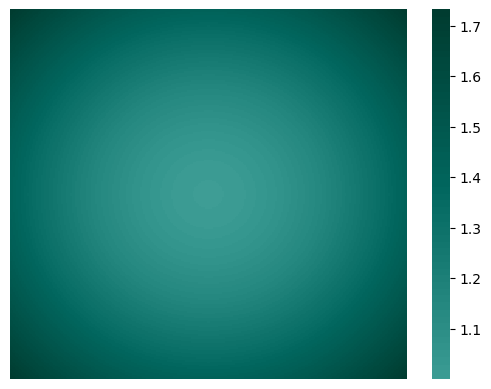

In [177]:
plot_scalars(            np.linalg.norm(z,axis=(2,3))   )

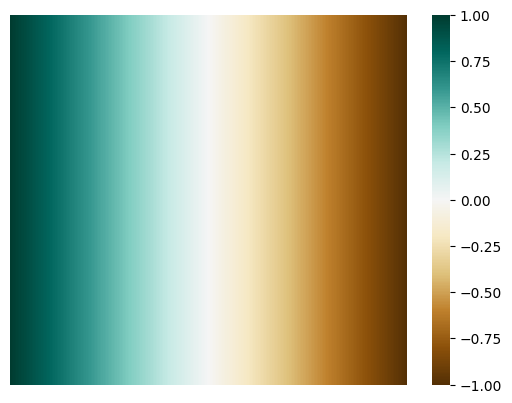

In [180]:
plot_scalars( np.linalg.det(z))

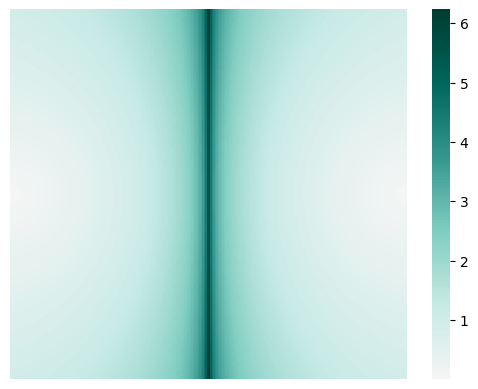

In [182]:
plot_scalars( np.log( np.linalg.cond(z)))

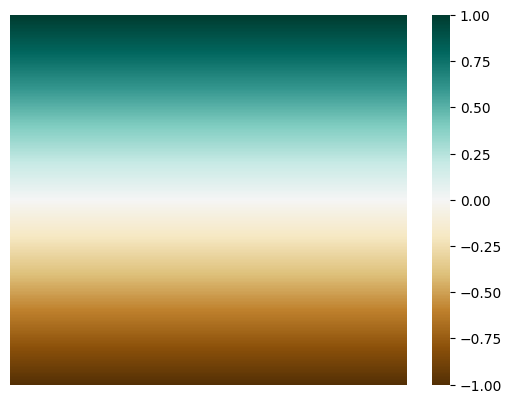

In [185]:
plot_scalars( np.trace(z, axis1=2, axis2=3))

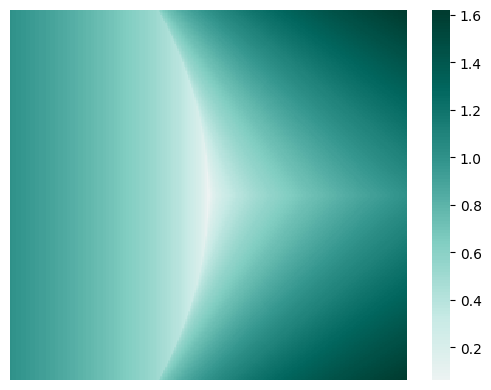

In [188]:
plot_scalars(  np.sort(np.abs(np.linalg.eigvals(z)))[:,:,1]    )

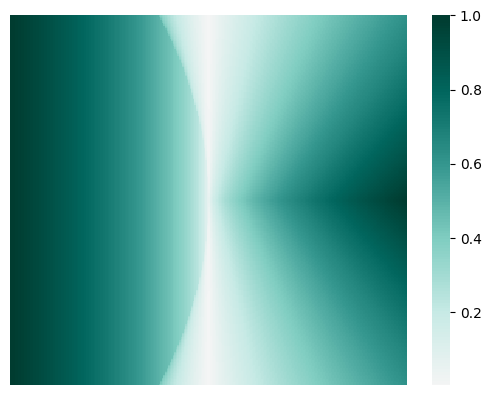

In [189]:
plot_scalars(  np.sort(np.abs(np.linalg.eigvals(z)))[:,:,0]    )

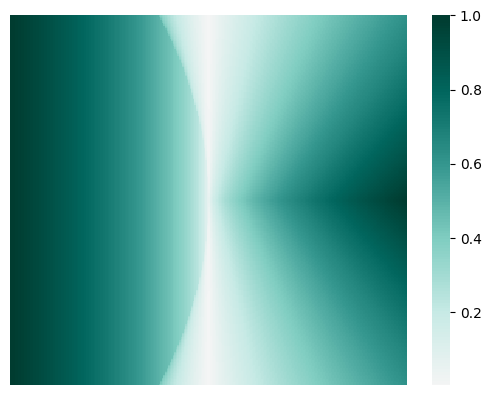

In [178]:
plot_scalars(np.abs(np.linalg.eigvals(z)[:,:,0]))

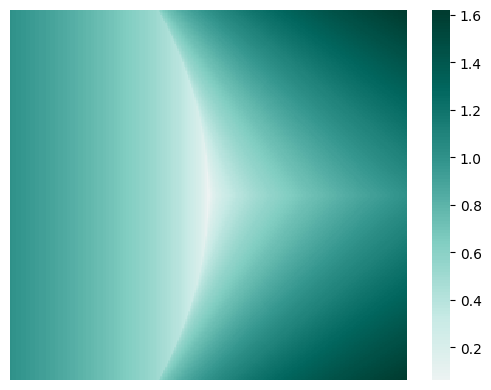

In [179]:
plot_scalars(np.abs(np.linalg.eigvals(z)[:,:,1]))

In [150]:
z

array([[[[ 1., -1.],
         [ 0.,  1.]],

        [[ 1.,  0.],
         [ 0.,  1.]],

        [[ 1.,  1.],
         [ 0.,  1.]]],


       [[[ 1., -1.],
         [ 0.,  0.]],

        [[ 1.,  0.],
         [ 0.,  0.]],

        [[ 1.,  1.],
         [ 0.,  0.]]],


       [[[ 1., -1.],
         [ 0., -1.]],

        [[ 1.,  0.],
         [ 0., -1.]],

        [[ 1.,  1.],
         [ 0., -1.]]]])

In [175]:
###np.matmul(w,d0)
ff=np.dot
ff=np.matmul
ff=np.inner
print(ff(w,w).shape,)
(
ff(w,c0).shape,
ff(w,d0).shape,
ff(c0,c0).shape,
ff(d0,d0).shape,
)

(4, 4, 2, 4, 4, 2)


((4, 4, 2, 4, 4), (4, 4, 2, 4, 4, 1), (4, 4, 4, 4), (4, 4, 1, 4, 4, 1))

In [176]:
#np.matmul(w,w)

In [192]:
ve=np.array([0.95,0.3])
vd=np.array([1,0])
ve=np.array([0,1])
np.matmul(c0,vd ).shape
#np.matmul(d0,vd ).shape
np.matmul(y,vd )
c0*x

array([[[-2.  ,  0.  ],
        [-0.67,  0.  ],
        [ 0.67,  0.  ],
        [ 2.  ,  0.  ]],

       [[-2.  ,  0.  ],
        [-0.67,  0.  ],
        [ 0.67,  0.  ],
        [ 2.  ,  0.  ]],

       [[-2.  , -0.  ],
        [-0.67, -0.  ],
        [ 0.67, -0.  ],
        [ 2.  , -0.  ]],

       [[-2.  , -0.  ],
        [-0.67, -0.  ],
        [ 0.67, -0.  ],
        [ 2.  , -0.  ]]])

In [183]:
wve=np.matmul(w,ve )
wve.shape, wve

((4, 4, 2),
 array([[[-2.  ,  2.  ],
         [-0.67,  2.  ],
         [ 0.67,  2.  ],
         [ 2.  ,  2.  ]],
 
        [[-2.  ,  0.67],
         [-0.67,  0.67],
         [ 0.67,  0.67],
         [ 2.  ,  0.67]],
 
        [[-2.  , -0.67],
         [-0.67, -0.67],
         [ 0.67, -0.67],
         [ 2.  , -0.67]],
 
        [[-2.  , -2.  ],
         [-0.67, -2.  ],
         [ 0.67, -2.  ],
         [ 2.  , -2.  ]]]))

In [179]:
#np.matmul(ve, wve )
np.matmul( wve, ve ) ,   np.matmul( wve, vd )


(array([[ 2.  ,  2.  ,  2.  ,  2.  ],
        [ 0.67,  0.67,  0.67,  0.67],
        [-0.67, -0.67, -0.67, -0.67],
        [-2.  , -2.  , -2.  , -2.  ]]),
 array([[-2.  , -0.67,  0.67,  2.  ],
        [-2.  , -0.67,  0.67,  2.  ],
        [-2.  , -0.67,  0.67,  2.  ],
        [-2.  , -0.67,  0.67,  2.  ]]))

In [180]:
np.tensordot(w, ve)

IndexError: tuple index out of range

In [181]:
np.inner(w, ve  )
np.inner( ve , w )


array([[[-2.  ,  2.  ],
        [-0.67,  2.  ],
        [ 0.67,  2.  ],
        [ 2.  ,  2.  ]],

       [[-2.  ,  0.67],
        [-0.67,  0.67],
        [ 0.67,  0.67],
        [ 2.  ,  0.67]],

       [[-2.  , -0.67],
        [-0.67, -0.67],
        [ 0.67, -0.67],
        [ 2.  , -0.67]],

       [[-2.  , -2.  ],
        [-0.67, -2.  ],
        [ 0.67, -2.  ],
        [ 2.  , -2.  ]]])

In [182]:
np.dot(w, ve)

array([[[-2.  ,  2.  ],
        [-0.67,  2.  ],
        [ 0.67,  2.  ],
        [ 2.  ,  2.  ]],

       [[-2.  ,  0.67],
        [-0.67,  0.67],
        [ 0.67,  0.67],
        [ 2.  ,  0.67]],

       [[-2.  , -0.67],
        [-0.67, -0.67],
        [ 0.67, -0.67],
        [ 2.  , -0.67]],

       [[-2.  , -2.  ],
        [-0.67, -2.  ],
        [ 0.67, -2.  ],
        [ 2.  , -2.  ]]])

# todo

In [ ]:
x.ravel()

In [40]:
x.flatten()

array([-2.  ,  2.  , -1.92,  2.  , -1.84,  2.  , -1.76,  2.  , -1.68,
        2.  , ...,  1.68, -2.  ,  1.76, -2.  ,  1.84, -2.  ,  1.92, -2.  ,
        2.  , -2.  ])